In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_rocrit = pd.read_csv('rocrit_model.csv')
df_stan = pd.read_csv('standard_model.csv')
mapper = {'#Teff(K)': 'Teff', ' Prot(days)': 'Prot', ' Age(Gyr)': 'Age', ' Mass(Msun)': 'Mass'}
df_rocrit.rename(columns=mapper, inplace=True)
df_stan.rename(columns=mapper, inplace=True)

In [3]:
df_rocrit.head()

,Teff,Prot,Age,Mass,Ro
0,3425.943077,3.132252,2.343081,0.39749,0.028923
1,3426.052848,0.769080,1.110579,0.38310,0.007271
2,3429.332363,0.830315,1.162998,0.40312,0.008025
3,3425.867537,1.067847,1.398936,0.39909,0.009989
4,3425.887204,2.477922,2.144391,0.39106,0.022913


In [4]:
df_stan.head()

,# Teff(K),Prot,Age,Mass,Ro
0,3425.943077,3.132252,2.343081,0.39749,0.028923
1,3426.052848,0.769080,1.110579,0.38310,0.007271
2,3429.332363,0.830315,1.162998,0.40312,0.008025
3,3425.867537,1.067847,1.398936,0.39909,0.009989
4,3425.887204,2.477922,2.144391,0.39106,0.022913


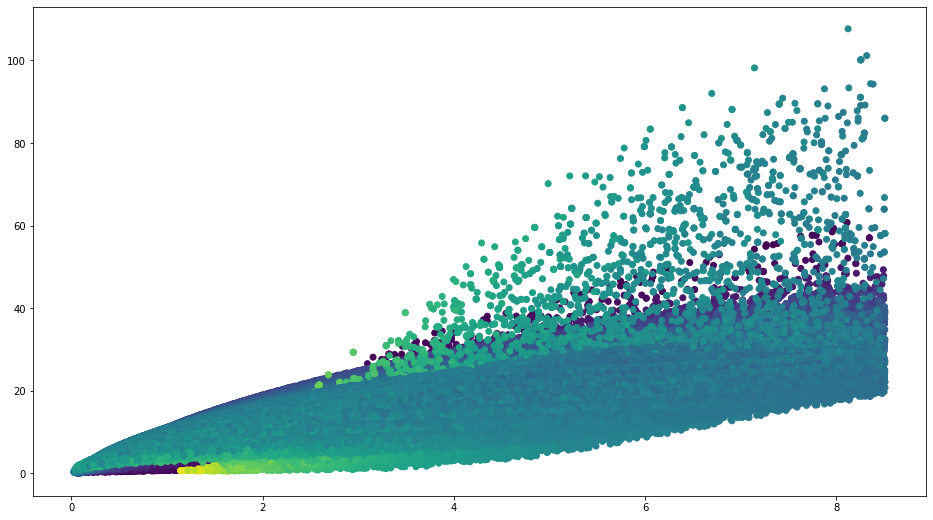

In [5]:
fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(df_rocrit.Age, df_rocrit.Prot, c=df_rocrit.Mass)

In [6]:
print(f'Length of dataset rocrit : {len(df_rocrit)}')

Length of dataset rocrit : 140000


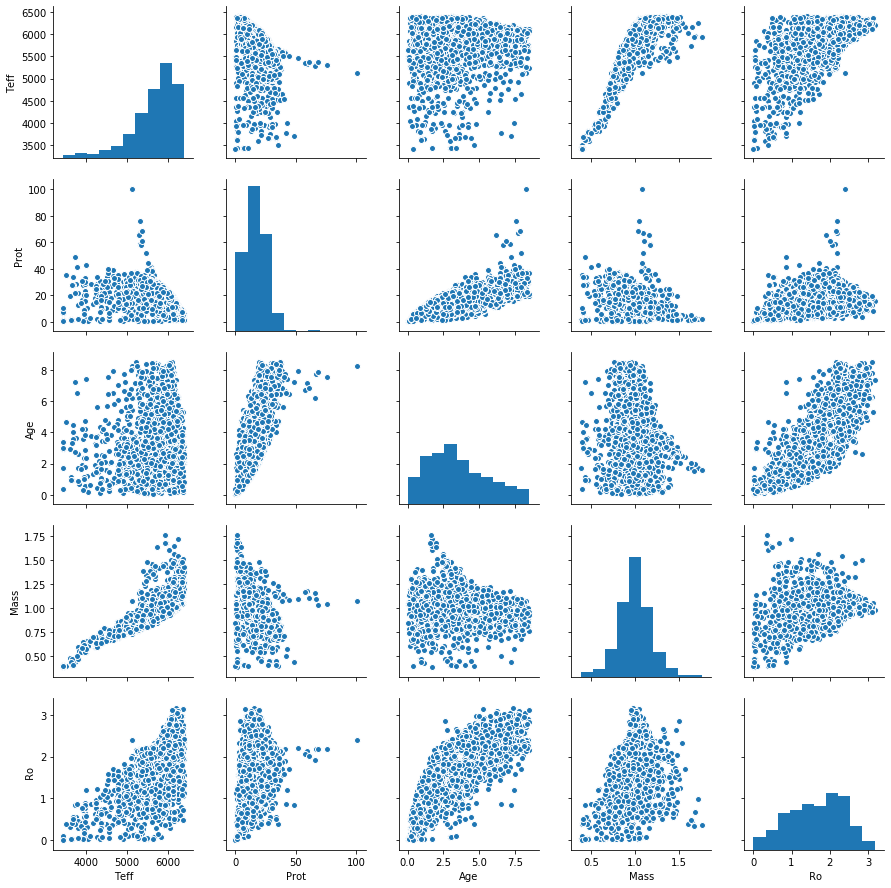

In [8]:
sns.pairplot(df_rocrit.sample(frac=0.01))

In [99]:
from sklearn.ensemble import RandomForestRegressor

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [100]:
small = df_rocrit.sample(frac=0.1)

In [122]:
x = np.log10((small[['Age', 'Mass', 'Teff']].values))
y = np.log10(small[['Prot']].values)
model = RandomForestRegressor()
model.fit(x, y)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [126]:
%%time
for i in range(1000):
    model.predict(np.log10([4.5, 1.0, 5777.0]).reshape(1, -1))

CPU times: user 463 ms, sys: 2.99 ms, total: 466 ms
Wall time: 468 ms


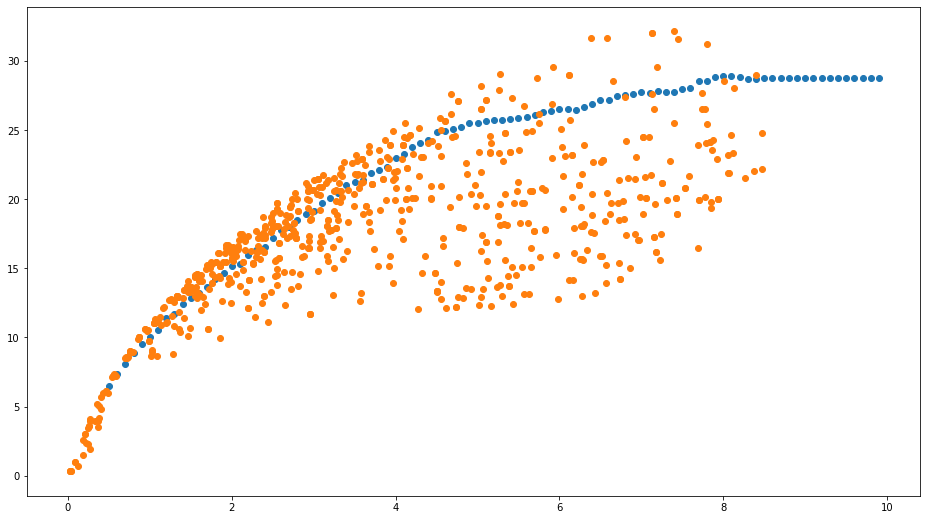

In [127]:
age_ = np.arange(0.5, 10, 0.1)
x_eval = np.log10(np.vstack([age_, np.ones(len(age_)), np.ones(len(age_))*5777.0]).T)
fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(age_, 10**model.predict(x_eval))

df = df_rocrit.loc[np.abs(df_rocrit.Mass - 1.0) < 0.001]
ax.scatter(df.Age, df.Prot)

In [133]:
from scipy.interpolate import NearestNDInterpolator as intrp

In [134]:
lnd = intrp(x, y)

In [135]:
print(10**lnd(np.log10([4.5, 1.0, 5777.0])))

[[24.80177588]]


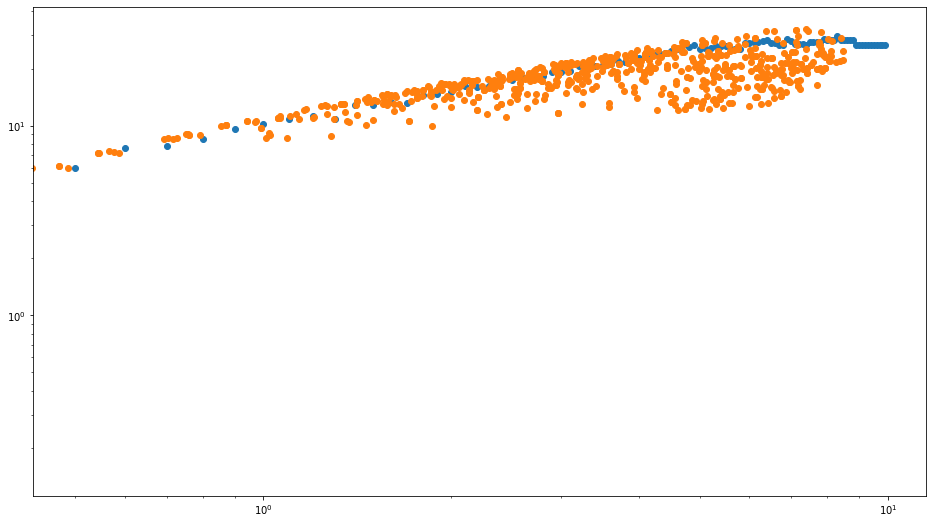

In [159]:
age_ = np.arange(0.5, 10, 0.1)
x_eval = np.log10(np.vstack([age_, np.ones(len(age_)), np.ones(len(age_))*5777.0]).T)
fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(age_, 10**lnd(x_eval))

df = df_rocrit.loc[np.abs(df_rocrit.Mass - 1.0) < 0.001]
ax.scatter(df.Age, df.Prot)
ax.set_xscale('log')
ax.set_yscale('log')